<a href="https://colab.research.google.com/github/Aqillaaprly/rakamin_homework/blob/main/Aqilla_Aprily_Kurnia_Sari_Batch_59_DS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [9]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/rakamin/flight.csv')
print("Shape:", df.shape)
display(df.head())

Shape: (62988, 23)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [10]:
# Data info
print("Data Info:")
df.info()

# Check Missing Values
print("\nMissing Values Count:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END

In [11]:
# drop id
df = df.drop(columns=['MEMBER_NO'])
print("New shape:", df.shape)

New shape: (62988, 22)


In [12]:
# encoding gender

df['GENDER'] = LabelEncoder().fit_transform(df['GENDER'])

# Feature Engineering

### PCA

PCA Loadings:


,PC1,PC2,PC3
GENDER,0.043453,0.042094,0.419372
FFP_TIER,0.264432,0.019000,0.098072
AGE,0.043820,0.025688,0.579492
FLIGHT_COUNT,0.354350,0.000635,-0.035654
BP_SUM,0.378985,0.028381,0.055861
SUM_YR_1,0.337773,-0.014406,0.057527
SUM_YR_2,0.359022,0.049648,0.029428
SEG_KM_SUM,0.369164,0.020884,-0.038113
LAST_TO_END,-0.150708,-0.432870,0.053353
AVG_INTERVAL,-0.129869,0.594009,-0.002866



Feature Importance (Top 5):


,0
MAX_INTERVAL,0.755714
AVG_INTERVAL,0.726743
AGE,0.649000
LAST_TO_END,0.636931
Point_NotFlight,0.634549


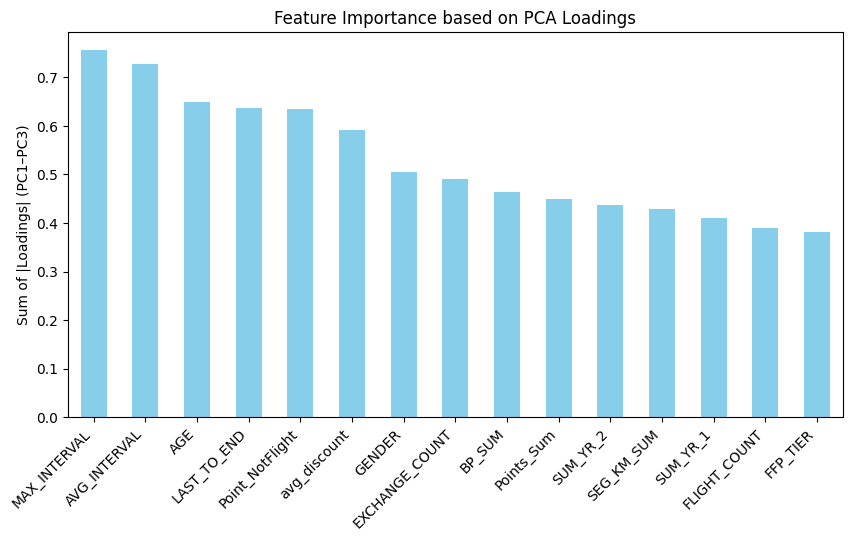

In [14]:
# Numerik data
df_num = df.select_dtypes(include=['int64', 'float64'])

# Isi missing values
df_num = df_num.fillna(df_num.median())

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# PCA
pca = PCA(n_components=3)
pca.fit(X_scaled)

# Buat loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(3)],
    index=df_num.columns
)

print("PCA Loadings:")
display(loadings)

# Hitung kontribusi absolut
feature_importance = loadings[['PC1','PC2','PC3']].abs().sum(axis=1)
feature_importance = feature_importance.sort_values(ascending=False)

print("\nFeature Importance (Top 5):")
display(feature_importance.head(5))

# Visualisasi
feature_importance.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Feature Importance based on PCA Loadings")
plt.ylabel("Sum of |Loadings| (PC1–PC3)")
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan hasil PCA, top 5 fitur yang bisa digunakan untuk clustering adalah max_interval, avg_interval, age, last_to_end, dan point_notflight. Kelima fitur ini dipilih karena memiliki nilai loading yang tinggi pada komponen utama (PC1-PC3), sehingga dianggap paling representatif dalam menjelaskan variasi data pelanggan secara keseluruhan. Fitur-fitur ini selanjutnya digunakan sebagai input dalam proses clustering menggunakan algoritma K-Means untuk mengelompokkan pelanggan berdasarkan kesamaan pola perilaku dan karakteristiknya.

# Clustering

In [17]:
best_features = ['MAX_INTERVAL', 'AVG_INTERVAL', 'AGE', 'LAST_TO_END', 'Point_NotFlight']
X_selected = df_num[best_features]

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


In [18]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

sse_table = pd.DataFrame({ 'k': list(range(1, 11)), 'SSE': inertia })
print(sse_table)

    k            SSE
0   1  314940.000000
1   2  247077.611803
2   3  197552.379660
3   4  168809.364185
4   5  129374.625836
5   6  113316.237224
6   7  105231.620454
7   8  100193.945176
8   9   93625.601482
9  10   88016.258224


Terlihat bahwa SSE turun drastis dari k=1 hingga k=4 atau 5, lalu penurunannya mulai melambat setelah itu.
Artinya, setelah titik itu, menambah jumlah cluster tidak lagi memberikan peningkatan signifikan dalam akurasi pembagian data. Berdasarkan pola tersebut, kemungkinan jumlah cluster optimal (k optimal) berada di sekitar k = 4 atau k = 5

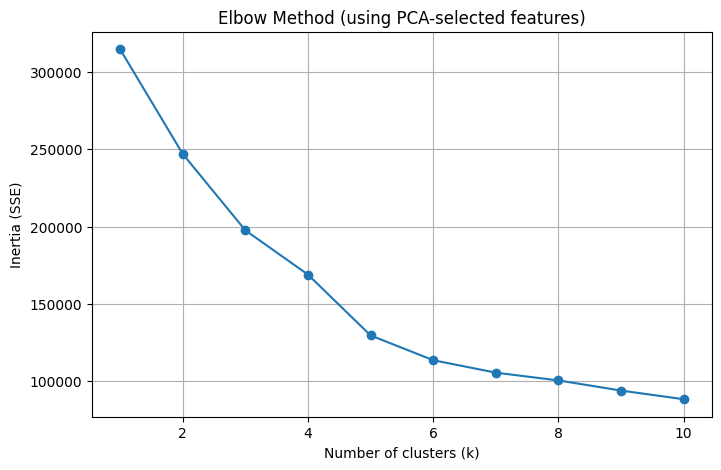

In [21]:
# ELBOW METHOD
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method (using PCA-selected features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.show()

Dari grafik Elbow Method, terlihat bahwa penurunan nilai inertia (SSE) mulai melambat setelah k = 4. Ini menandakan bahwa k = 4 merupakan jumlah cluster yang optimal karena penambahan jumlah cluster setelah itu tidak memberikan pengurangan SSE yang signifikan.

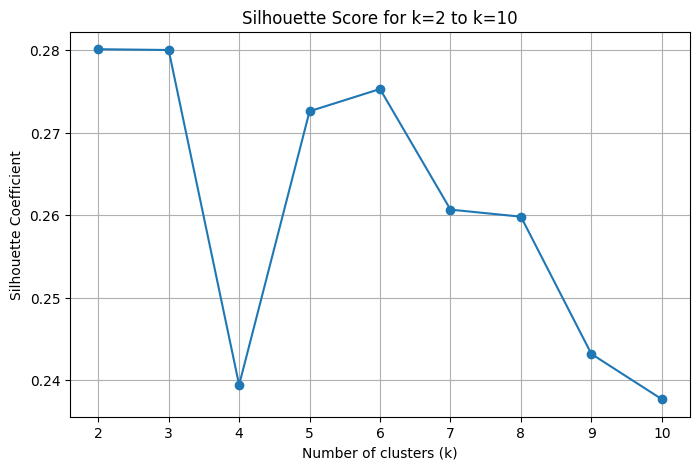

k=2, silhouette=0.280
k=3, silhouette=0.280
k=4, silhouette=0.239
k=5, silhouette=0.273
k=6, silhouette=0.275
k=7, silhouette=0.261
k=8, silhouette=0.260
k=9, silhouette=0.243
k=10, silhouette=0.238


In [22]:
# SILHOUTTE METHOD

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for k=2 to k=10')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

for i, score in enumerate(silhouette_scores, start=2):
    print(f"k={i}, silhouette={score:.3f}")

Nilai Silhouette Score menunjukkan rata-rata antara 0.23–0.28, di mana nilai tertinggi berada pada k = 2 dan k = 3 (0.280). Artinya, hasil clustering dengan jumlah cluster 2 atau 3 memiliki pemisahan antar cluster yang paling jelas dan kohesi yang baik di dalam cluster.

In [23]:
# DBI
dbi = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies-Bouldin Index:", dbi)

Davies-Bouldin Index: 1.1524522915812525


nilai Davies–Bouldin Index (DBI) sebesar 1.15 menunjukkan bahwa hasil cluster memiliki tingkat pemisahan yang cukup baik, karena semakin kecil nilai DBI berarti kualitas cluster semakin baik.

#### Kesimpulan awal
Berdasarkan hasil Elbow Method, Silhouette Score, dan Davies–Bouldin Index, jumlah cluster optimal berada pada kisaran k = 3–4. Nilai DBI sebesar 1.15 mendukung bahwa struktur cluster yang dihasilkan sudah cukup stabil dan terpisah dengan baik, meskipun masih dapat ditingkatkan dengan penyesuaian fitur atau parameter clustering.

# Interprestasi cluster

In [25]:
# Menentukan dan menjalankan K-Means optimal berdasarkan hasil sebelumnya
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_scaled)

df['cluster'] = labels

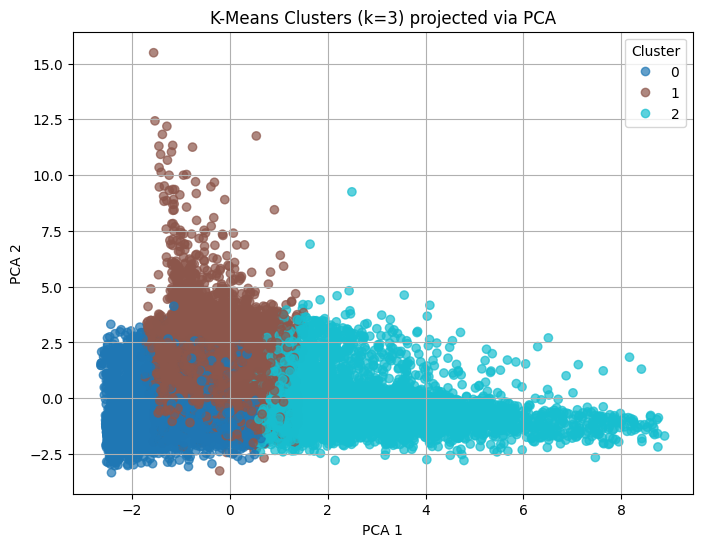

In [26]:
# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'K-Means Clusters (k={k_opt}) projected via PCA')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

In [28]:
# Pusat cluster dalam skala asli
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=best_features)
centers_df['cluster'] = centers_df.index
print("\nCluster centers (in original scale):")
print(centers_df)


Cluster centers (in original scale):
   MAX_INTERVAL  AVG_INTERVAL        AGE  LAST_TO_END  Point_NotFlight  \
0     67.141852     35.337018  41.581192   468.249605         1.114788   
1    146.580982     45.699538  42.959541    83.291115         3.623417   
2    366.591093    190.359511  41.841023   129.016228         1.600057   

   cluster  
0        0  
1        1  
2        2  


In [31]:
# Statistik tiap cluster
cluster_summary = df.groupby('cluster')[best_features].agg(['count','mean','median','std']).T
print("\nDescriptive statistics per cluster:")
print(cluster_summary)

# versi ringkas per cluster
for c in sorted(df['cluster'].unique()):
    print(f"\n=== Cluster {c} Summary ===")
    print(df[df['cluster']==c][best_features].describe().T)



Descriptive statistics per cluster:
cluster                            0             1             2
MAX_INTERVAL    count   13923.000000  38470.000000  10595.000000
                mean       67.127631    146.590252    366.606701
                median     53.000000    141.000000    354.000000
                std        63.372398     74.126785    104.110501
AVG_INTERVAL    count   13923.000000  38470.000000  10595.000000
                mean       35.328112     45.706688    190.393021
                median     25.428571     39.857143    158.333333
                std        35.631717     28.697988    113.486159
AGE             count   13811.000000  38242.000000  10515.000000
                mean       41.579683     42.978505     41.827770
                median     40.000000     42.000000     41.000000
                std        10.317421      9.637357     10.077449
LAST_TO_END     count   13923.000000  38470.000000  10595.000000
                mean      468.345759     83.334702   

Model K-Means dengan k=3 berhasil mengelompokkan pelanggan menjadi tiga segmen yang berbeda perilaku:

* Cluster 0 – Dormant Users

* Cluster 1 – Active Loyal Users

* Cluster 2 – Seasonal Users

Strategi yang tepat per segmen akan membantu meningkatkan retensi dan frekuensi pembelian pelanggan.